In [13]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from IPython.display import Image, display

In [14]:
from langchain_groq import ChatGroq

In [47]:
groq_api_key = "enter your api key"
llm = ChatGroq(groq_api_key=groq_api_key, model_name = "Gemma2-9b-it")

In [33]:
class State(TypedDict):
    messages:Annotated[list, add_messages]
    sentiment: str
    
def preprocess(state: State) -> State:
    cleaned = state['messages'][-1].content.strip()
    state['messages'][-1].content = cleaned
    return state

def analyze_sentiment(state: State) -> State:
    msg = state["messages"][-1].content
    state["sentiment"] = 'positive' if 'good' in msg else 'netural'
    return state

def chatbot(state: State) -> State:
    return {'messages': llm.invoke(state['messages'])}

def logger(state: State) -> State:
    print(f'LOG:{state['messages'][-1].content}, Sentiment: {state.get('sentiment')}')
    return state

In [38]:
builder = StateGraph(State)
builder.add_node('preprocess', preprocess)
builder.add_node('analyze_sentiment', analyze_sentiment)
builder.add_node('chatbot',chatbot)
builder.add_node('logger', logger)

In [39]:
builder.add_edge(START, 'preprocess')
builder.add_edge('preprocess','analyze_sentiment')
builder.add_edge('analyze_sentiment', 'chatbot')
builder.add_edge('chatbot', 'logger')
builder.add_edge('logger', END)

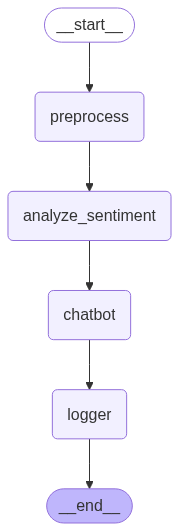

In [40]:
builder.compile()

In [42]:
graph = builder.compile()

In [46]:
input_message = 'This is Samson Kadarikota training program'
final_state = graph.invoke({"messages":('user', input_message)})

print('Final state:', final_state)
print('chatbots response:', final_state['messages'][-1].content)
print('Detected sentiment:', final_state['sentiment'])

input_message_2 = 'This is netural message'
final_state_2 = graph.invoke({"messages":('user', input_message_2)})

print('Final state 2:', final_state_2)
print('chatbots response 2:', final_state_2['messages'][-1].content)
print('Detected sentiment 2:', final_state_2['sentiment'])

LOG:Please provide me with more information about Samson Kadarikota's training program! I need context to help you. 

For example, tell me:

* **What is Samson Kadarikota's field?**  Is he an athlete, a musician, a programmer, etc.?
* **What are his goals?** What does he hope to achieve with his training?
* **What kind of information are you looking for?** Do you want a sample workout plan, advice on nutrition, tips for motivation, or something else?

The more details you give me, the better I can assist you in creating a helpful and relevant training program for Samson. 
, Sentiment: netural
Final state: {'messages': [HumanMessage(content='This is Samson Kadarikota training program', additional_kwargs={}, response_metadata={}, id='8e04b5ee-3034-46ed-a6dc-6bb51947ffdc'), AIMessage(content="Please provide me with more information about Samson Kadarikota's training program! I need context to help you. \n\nFor example, tell me:\n\n* **What is Samson Kadarikota's field?**  Is he an athlete